In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [106]:
import numpy as np
import pandas as pd

# Importing Classifier Modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
import seaborn as sns
sns.set()


training = pd.read_csv('/content/input/train.csv')
testing = pd.read_csv('/content/input/test.csv')

In [107]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [108]:
training.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [109]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [110]:
training[training.isna().any(axis=1)].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False


In [111]:
len(training[training.isna().any(axis=1)])

2087

In [112]:
def cabinSplit(y):
    if len(str(y).split('/'))<3:
        return['null','null','null']
    else:
        return str(y).split('/')

In [113]:
def dataPrep(training):
    training.drop('Name', axis = 1, inplace = True)
    training['RoomService'].fillna(0,inplace = True)
    training['FoodCourt'].fillna(0,inplace = True)
    training['ShoppingMall'].fillna(0,inplace = True)
    training['Spa'].fillna(0,inplace = True)
    training['VRDeck'].fillna(0,inplace = True)
    
    training['VIP'].fillna('null',inplace = True)
    training['Age'].fillna(training['Age'].mean(),inplace = True)
    training['Destination'].fillna('null',inplace = True)
    
    training['HomePlanet'].fillna('null',inplace = True)
    training['CryoSleep'].fillna('null',inplace = True)
    
    training['Cabin_Temp'] = training['Cabin'].apply(lambda y: cabinSplit(y))
    training['Cabin_Deck'] = training['Cabin_Temp'].apply(lambda y: y[0])
    training['Cabin_Side'] = training['Cabin_Temp'].apply(lambda y: y[2])
    training.drop(['Cabin','Cabin_Temp'], axis = 1, inplace = True)

In [114]:
trained_data = training.copy()

In [115]:
dataPrep(trained_data)

In [116]:
trained_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [117]:
trained_data.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
0        0001_01     Europa     False    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False    TRAPPIST-1e  16.0  False   
...          ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False    55 Cancri e  32.0  False   
8692     9280_02     Europa     False    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0             0.0        0.0           0.0     0.0     0.0      

In [118]:
def bar_chart(attribute):
    tranported = training[training['Transported']==True][attribute].value_counts()
    nontransported = training[training['Transported']==False][attribute].value_counts()
    bc = pd.DataFrame([tranported,nontransported])
    bc.index = ['Transported','Non-Transported']
    bc.plot(kind='bar',stacked=True, figsize=(15,3))

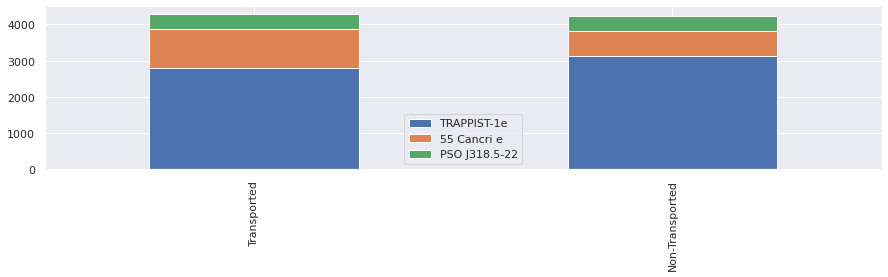

In [119]:
bar_chart('Destination')

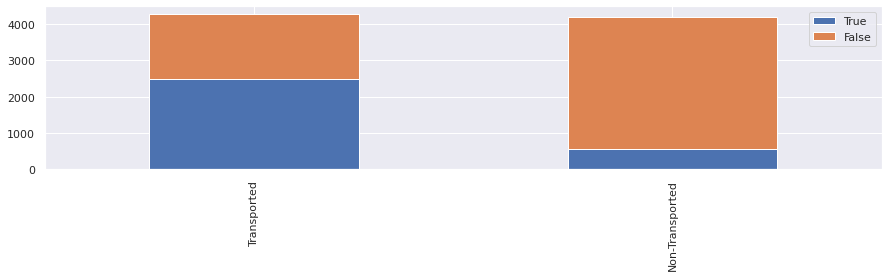

In [120]:
bar_chart('CryoSleep')

In [121]:
trainX = trained_data.drop(['Transported','PassengerId'], axis = 1)
trainY = trained_data['Transported']

In [122]:
trainX.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,S


In [123]:
trainX = pd.get_dummies(trainX)

In [124]:
trainX.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_null,...,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_null,Cabin_Side_P,Cabin_Side_S,Cabin_Side_null
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size = 0.2, random_state = 1234)

In [126]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 1537 to 1318
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6954 non-null   float64
 1   RoomService                6954 non-null   float64
 2   FoodCourt                  6954 non-null   float64
 3   ShoppingMall               6954 non-null   float64
 4   Spa                        6954 non-null   float64
 5   VRDeck                     6954 non-null   float64
 6   HomePlanet_Earth           6954 non-null   uint8  
 7   HomePlanet_Europa          6954 non-null   uint8  
 8   HomePlanet_Mars            6954 non-null   uint8  
 9   HomePlanet_null            6954 non-null   uint8  
 10  CryoSleep_False            6954 non-null   uint8  
 11  CryoSleep_True             6954 non-null   uint8  
 12  CryoSleep_null             6954 non-null   uint8  
 13  Destination_55 Cancri e    6954 non-null   ui

In [127]:
Y_train.shape

(6954,)

In [128]:
X_test.shape

(1739, 32)

In [129]:
Y_test.shape

(1739,)

In [130]:
ppln = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234))
}

In [131]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [132]:
param_grid = {
    'rf': {
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300]
    } 
}

In [133]:
ppln.items()

dict_items([('rf', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1234))])), ('gb', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))]))])

In [134]:
model_fitting = {}
for alg_id, ppln in ppln.items():
  model = GridSearchCV(ppln, param_grid[alg_id], cv=10, n_jobs=-1)
  print(f'{alg_id} model training.') 
  model.fit(X_train, Y_train)
  model_fitting[alg_id] = model

rf model training.
gb model training.


In [135]:
model_fitting['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=1234))])

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [137]:
for algo_name, model_name in model_fitting.items(): 
  test_prediction = model_name.predict(X_test)
  acc_score = accuracy_score(Y_test, test_prediction)
  print(f'{algo_name}: Accuracy score : {acc_score}')

rf: Accuracy score : 0.8039102932719954
gb: Accuracy score : 0.8113858539390454


In [138]:
import pickle

In [139]:
with open('gradientboosted.pkl', 'wb') as f: 
  pickle.dump(model_fitting['gb'], f)

In [140]:
with open('gradientboosted.pkl', 'rb') as f: 
  model_reld = pickle.load(f)

In [141]:
tested_data = testing.copy()
dataPrep(tested_data)
tested_data = pd.get_dummies(tested_data.drop('PassengerId', axis=1))

In [142]:
len(tested_data.columns)

32

In [143]:
len(trainX.columns)

32

In [144]:
final_prediction = model_fitting['gb'].predict(tested_data)

In [145]:
Predictions = pd.DataFrame([testing['PassengerId'], final_prediction]).T
Predictions.columns = ['PassengerID', 'Transported']

In [146]:
Predictions.head()

,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [147]:
Predictions.to_csv('prediction_6.csv', index=False)